In [70]:
import pandas as pd
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # Setting style for all graphs
%matplotlib inline

import datetime as dt

df_2005_2007 = pd.read_csv("/content/drive/MyDrive/DAV_Datasets/accidents_2005_to_2007.csv")
df_2009_2011 = pd.read_csv("/content/drive/MyDrive/DAV_Datasets/accidents_2009_to_2011.csv")
df_2012_2014 = pd.read_csv("/content/drive/MyDrive/DAV_Datasets/accidents_2012_to_2014.csv")

accidents = pd.concat([df_2005_2007, df_2009_2011,df_2012_2014], axis=0)
accidents.info()
accidents.head()

<ipython-input-70-0e93f8bdfe38>:10: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2005_2007 = pd.read_csv("/content/drive/MyDrive/DAV_Datasets/accidents_2005_to_2007.csv")
<ipython-input-70-0e93f8bdfe38>:12: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2012_2014 = pd.read_csv("/content/drive/MyDrive/DAV_Datasets/accidents_2012_to_2014.csv")


<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
#Dropping the colomns we will not need
accidents = accidents.drop(['Accident_Index',
       'Police_Force',
       '1st_Road_Class', '1st_Road_Number','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number',
      'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       ], axis=1)
accidents.isnull().sum()

Location_Easting_OSGR                          101
Location_Northing_OSGR                         101
Longitude                                      101
Latitude                                       101
Accident_Severity                                0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                           117
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
Road_Type                                        0
Speed_limit                                      0
Pedestrian_Crossing-Human_Control               17
Pedestrian_Crossing-Physical_Facilities         34
Light_Conditions                                 0
Weather_Conditions                             126
Road_Surface_Conditions                       1958
Special_Conditions_at_Site     

In [71]:
selRows = accidents[accidents['Time'].isna()].index
accidents = accidents.drop(selRows, axis=0)
accidents["Time"] = pd.to_datetime(accidents["Time"], format='%H:%M')
accidents["Hour"] = accidents["Time"].dt.hour


#accidents["Date"] = pd.to_datetime(accidents["Date"], format="%d/%m/%Y")
accidents["Month"] = pd.DatetimeIndex(accidents["Date"]).month
accidents_peryear = {}

years = ['2005', '2006', "2007", "2009", "2010", "2011", "2012", "2013", "2014"]
for year in years:
    accidents_peryear[year] = accidents[accidents["Year"]==int(year)]

accidents_perdow = {}

dow = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
for key in dow:
    accidents_perdow[dow[key]] = accidents[accidents["Day_of_Week"]==key]

months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

# for whatever reason, year 2007 doens't seem to be sorted by date
print("Before:", accidents_peryear["2007"]["Month"].unique())

accidents_peryear["2007"] = accidents_peryear["2007"].sort_values("Month")
print("After:", accidents_peryear["2007"]["Month"].unique())

Before: [ 5  2  8  3  9 10 12  1 11  6  7  4]
After: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [52]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,LSOA_of_Accident_Location,Year,Hour,Month
0,525680.0,178240.0,-0.191170,51.489096,2,1,1,04/01/2005,3,1900-01-01 17:42:00,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,1,E01002849,2005,17,4
1,524170.0,181650.0,-0.211708,51.520075,3,1,1,05/01/2005,4,1900-01-01 17:36:00,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,1,E01002909,2005,17,5
2,524520.0,182240.0,-0.206458,51.525301,3,2,1,06/01/2005,5,1900-01-01 00:15:00,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,1,E01002857,2005,0,6
3,526900.0,177530.0,-0.173862,51.482442,3,1,1,07/01/2005,6,1900-01-01 10:35:00,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,1,E01002840,2005,10,7
4,528060.0,179040.0,-0.156618,51.495752,3,1,1,10/01/2005,2,1900-01-01 21:13:00,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,1,E01002863,2005,21,10


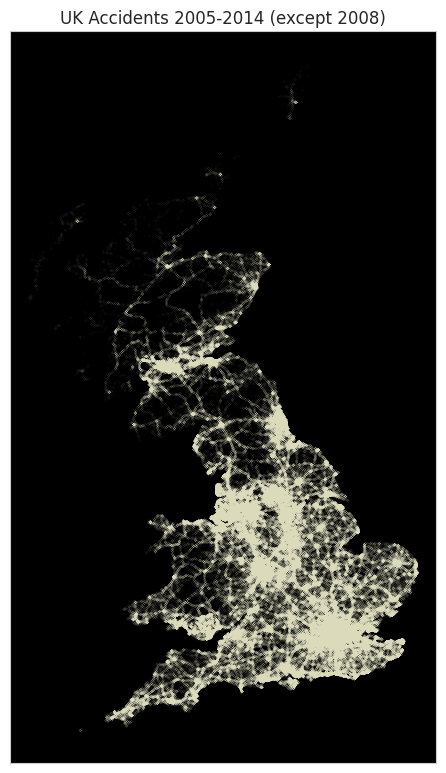

In [ ]:
#Plotting the map of accidents in the UK
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = accidents["Longitude"], y = accidents["Latitude"],s=0.005, alpha= 0.25, color="lightyellow")
plt.title("UK Accidents 2005-2014 (except 2008)")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
#Plotting the map of severity of accidents
import folium
import branca
import pandas as pd
print(folium.__file__)
print(folium.__version__)




df = accidents[(accidents['Year']==2014)&(accidents['LSOA_of_Accident_Location']=='E01004736') ]
print(len(df))
location = df['Latitude'].mean(), df['Longitude'].mean()
m = folium.Map(location=location,zoom_start=15)

#The num of casulaties for each accident can be determined and the colour assigned then added to the basemap.
for i in range(0,len(df)):
    severity = df['Accident_Severity'].iloc[i]
    if severity == 1:
        color = 'red' #Fatal
    elif severity == 2:
        color = 'orange' #Serious
    elif severity == 3:
        color = 'green' #Slight
    else:
        color = 'black'

    popup = folium.Popup('Accident', parse_html=True)
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]],popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(m)

m

/usr/local/lib/python3.10/dist-packages/folium/__init__.py
0.14.0
142


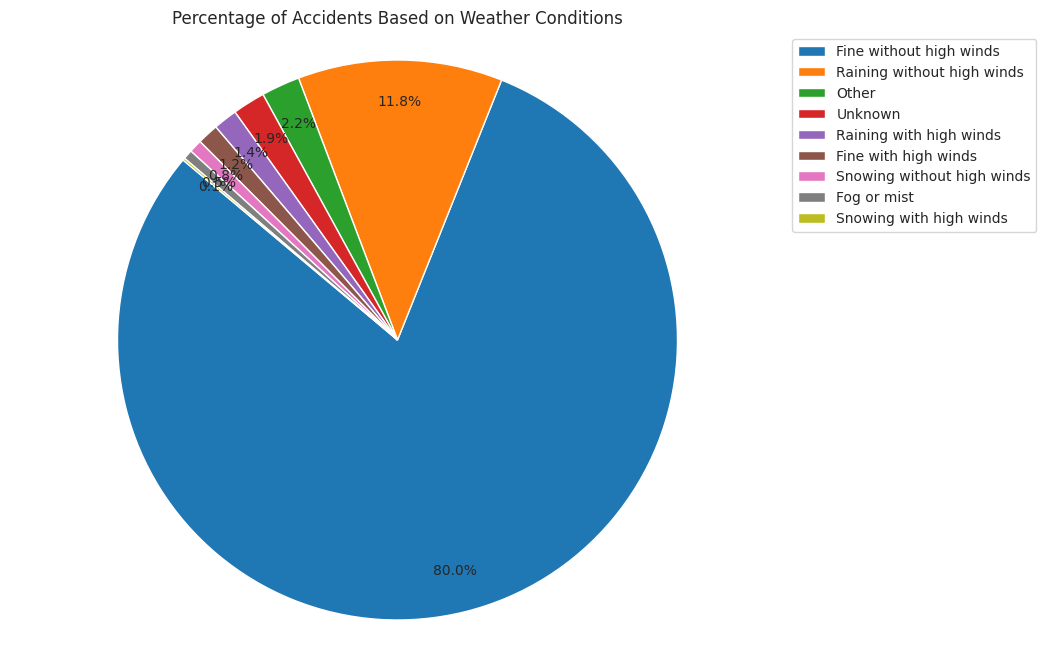

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each weather condition
weather_counts = accidents['Weather_Conditions'].value_counts()

# Plotting the pie chart without labels
plt.figure(figsize=(10, 8))
plt.pie(weather_counts, labels=[''] * len(weather_counts), autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Percentage of Accidents Based on Weather Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend
plt.legend(weather_counts.index, bbox_to_anchor=(1, 1), loc="upper left")

plt.show()


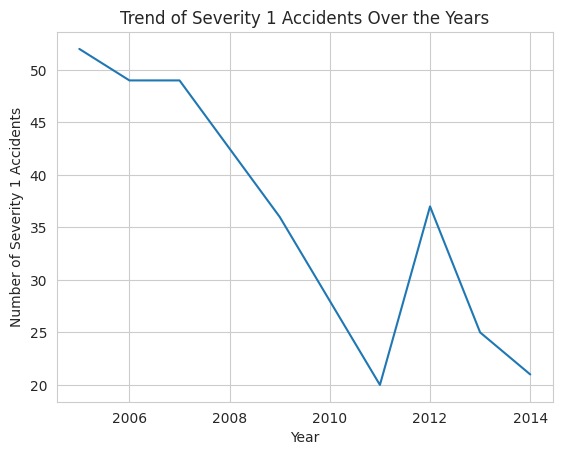

In [14]:
#Trend of Severity 1 Accidents Over the Years

# Filter accidents with severity 1
severity_1_accidents = accidents[accidents['Accident_Severity'] == 1]

# Group by year and count the number of accidents
df = severity_1_accidents.groupby('Year').size()

# Plotting
plt.plot(df.index, df.values)
plt.xlabel("Year")
plt.ylabel("Number of Severity 1 Accidents")
plt.title("Trend of Severity 1 Accidents Over the Years")
plt.show()


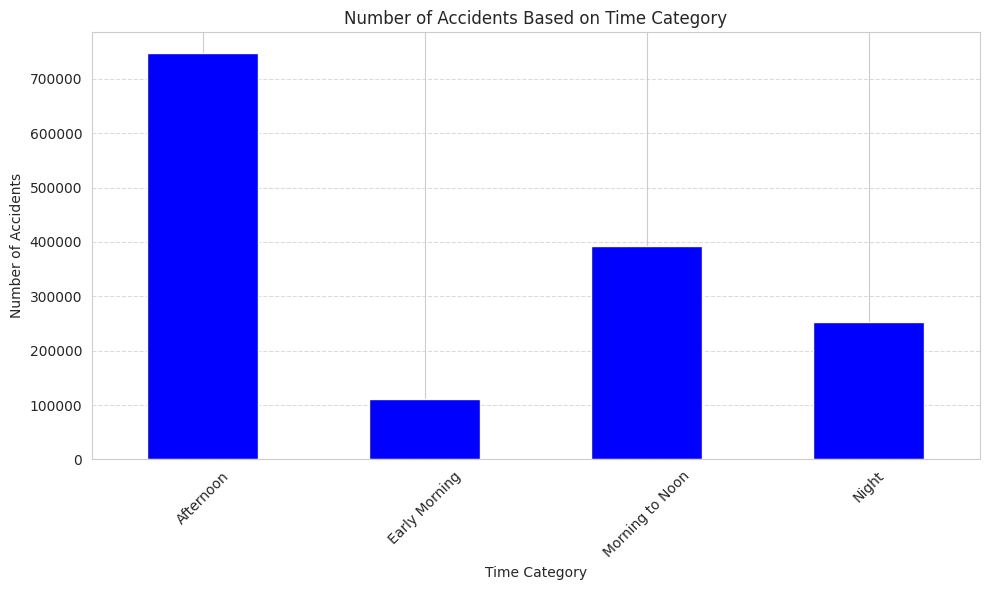

In [5]:
#Bar Chart representing Number of accidents in relation to time
import pandas as pd
import matplotlib.pyplot as plt

# Convert time of accident to datetime objects
accidents['Time'] = pd.to_datetime(accidents['Time'], format='%H:%M')

# Define time categories
def categorize_time(hour):
    if 0 <= hour < 7:
        return 'Early Morning'
    elif 7 <= hour < 12:
        return 'Morning to Noon'
    elif 12 <= hour < 19:
        return 'Afternoon'
    else:
        return 'Night'

# Apply categorization to create a new column
accidents['Time_Category'] = accidents['Time'].dt.hour.apply(categorize_time)

# Count occurrences of accidents in each time category
time_category_counts = accidents['Time_Category'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
time_category_counts.plot(kind='bar', color='blue')
plt.title('Number of Accidents Based on Time Category')
plt.xlabel('Time Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()



<ipython-input-21-98f62ff6504a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Light_Conditions"] = le.fit_transform(features["Light_Conditions"])
<ipython-input-21-98f62ff6504a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Road_Surface_Conditions"] = le.fit_transform(features["Road_Surface_Conditions"])
<ipython-input-21-98f62ff6504a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Most important features (top 7): Number_of_Vehicles         0.383077
Number_of_Casualties       0.211214
Speed_limit                0.149742
Light_Conditions           0.079589
Road_Type                  0.075667
Weather_Conditions         0.061249
Road_Surface_Conditions    0.039462
dtype: float64


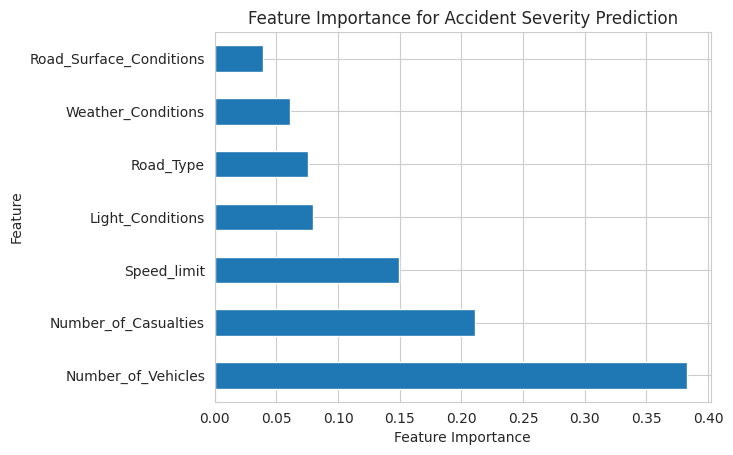

In [21]:
#Feature Importance

import pandas as pd

# Assuming 'accidents' is your DataFrame
features = accidents[["Number_of_Vehicles", "Road_Surface_Conditions", "Weather_Conditions", "Light_Conditions","Number_of_Casualties","Speed_limit","Road_Type"]]
target = accidents["Accident_Severity"]

from sklearn.preprocessing import LabelEncoder

# Encode the categorical columns
le = LabelEncoder()
features["Light_Conditions"] = le.fit_transform(features["Light_Conditions"])
features["Road_Surface_Conditions"] = le.fit_transform(features["Road_Surface_Conditions"])
features["Weather_Conditions"] = le.fit_transform(features["Weather_Conditions"])
features["Light_Conditions"] = le.fit_transform(features["Light_Conditions"])
features["Road_Type"] = le.fit_transform(features["Road_Type"])

from sklearn.ensemble import ExtraTreesClassifier

# Build and fit the model
model = ExtraTreesClassifier()
model.fit(features, target)

# Calculate feature importances
feat_importances = pd.Series(model.feature_importances_, index=features.columns)

# Print or plot feature importances
print(f"Most important features (top 7): {feat_importances.nlargest(7)}")
feat_importances.nlargest(19).plot(kind='barh')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Accident Severity Prediction")
plt.show()




In [ ]:
num_rows = len(accidents)
print("Number of rows:", num_rows)


Number of rows: 1503839


In [53]:
#Cleaning the dataset
accidents.dropna(inplace=True)
accidents.isnull().sum()

Location_Easting_OSGR                      0
Location_Northing_OSGR                     0
Longitude                                  0
Latitude                                   0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Date                                       0
Day_of_Week                                0
Time                                       0
Local_Authority_(District)                 0
Local_Authority_(Highway)                  0
Road_Type                                  0
Speed_limit                                0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Urban_or_Rural_Area                        0
LSOA_of_Accident_Location                  0
Year      

In [54]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,LSOA_of_Accident_Location,Year,Hour,Month
5,524770.0,181160.0,-0.203238,51.515540,3,2,1,11/01/2005,3,1900-01-01 12:40:00,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,1,E01002832,2005,12,11
47,526290.0,177800.0,-0.182546,51.485005,3,1,1,12/02/2005,7,1900-01-01 11:33:00,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,Roadworks,1,E01002912,2005,11,12
97,526090.0,177600.0,-0.185496,51.483253,3,3,1,09/03/2005,4,1900-01-01 16:55:00,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,Auto traffic signal partly defective,1,E01002912,2005,16,9
203,524650.0,178430.0,-0.205931,51.491031,3,2,1,05/05/2005,5,1900-01-01 23:00:00,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,Roadworks,1,E01001914,2005,23,5
465,524220.0,181510.0,-0.211037,51.518806,3,2,1,14/09/2005,4,1900-01-01 09:25:00,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,1,E01002878,2005,9,9


MACHINE LEARNING

Classification

In [ ]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X contains features and y contains target labels
X = accidents.drop(['Accident_Severity', 'Date','Time','Local_Authority_(Highway)','Local_Authority_(District)','LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions','Road_Type', 'Weather_Conditions', 'Light_Conditions','Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area'])

y = accidents['Accident_Severity']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing and training the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8617165188636705


In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[   3    0   72]
 [   0   38  842]
 [   0    6 5692]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Initialize the random forest classifier
classifier = RandomForestClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist,
                                   n_iter=50, cv=3, scoring='accuracy',
                                   n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_classifier = random_search.best_estimator_

# Make predictions
y_pred = best_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced'}
Accuracy: 0.8612655944686608


In [ ]:
# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X contains features and y contains target labels
X = accidents.drop(['Accident_Severity', 'Date','Time','Local_Authority_(Highway)','Local_Authority_(District)','LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions','Road_Type', 'Weather_Conditions', 'Light_Conditions','Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area'])

y = accidents['Accident_Severity']  # Target variable

# 2. Create the decision tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 3. Train the decision tree classifier
decision_tree_classifier.fit(X_train, y_train)

# 4. Make predictions using the trained model
y_pred_dt = decision_tree_classifier.predict(X_test)

# 5. Evaluate the accuracy of the decision tr#ee model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)


Decision Tree Accuracy: 0.7640162332782203
Confusion Matrix:
[[   6   14   55]
 [  13  197  670]
 [  48  770 4880]]


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# For GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# For RandomizedSearchCV (specify distributions for hyperparameters)
# random_search = RandomizedSearchCV(estimator=decision_tree_classifier, param_distributions=param_grid, cv=5, scoring='accuracy')

# Fit the search object to the training data
grid_search.fit(X_train, y_train)  # Or random_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_  # Or grid_search.best_estimator_ for RandomizedSearchCV
best_accuracy = grid_search.best_score_   # Or grid_search.best_score_ for RandomizedSearchCV
print("Best accuracy:", best_accuracy)
print("Best hyperparameters:", grid_search.best_params_)  # Or grid_search.best_params_ for RandomizedSearchCV




Best accuracy: 0.8631392855788869
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4}


In [ ]:
#ADABoost
from sklearn.ensemble import AdaBoostClassifier

# Assuming X contains features and y contains target labels
X = accidents.drop(['Accident_Severity', 'Date','Time','Local_Authority_(Highway)','Local_Authority_(District)','LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions','Road_Type', 'Weather_Conditions', 'Light_Conditions','Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area'])

y = accidents['Accident_Severity']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),  # Use decision trees as base learners
                                    n_estimators=100,  # Number of trees to ensemble
                                    random_state=42)  # Set random_state for reproducibility

ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.8563054261235533
Confusion Matrix:
[[   0    0   75]
 [   0    0  880]
 [   0    1 5697]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.5, 1.0],
    'estimator__max_depth': [1, 2, 3]
}


from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoost classifier instance with a DecisionTreeClassifier as the base estimator
ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)


# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the hyperparameter grid
grid_search.fit(X_train, y_train)

# Access the best model and its attributes
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print("Best AdaBoost accuracy:", best_accuracy)
print("Best hyperparameters:", grid_search.best_params_)


Best AdaBoost accuracy: 0.8634399314963609
Best hyperparameters: {'estimator__max_depth': 1, 'learning_rate': 0.5, 'n_estimators': 50}


In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# Assuming X contains features and y contains target labels
X = accidents.drop(['Accident_Severity', 'Date','Time','Local_Authority_(Highway)','Local_Authority_(District)','LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions','Road_Type', 'Weather_Conditions', 'Light_Conditions','Special_Conditions_at_Site','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Urban_or_Rural_Area'])

y = accidents['Accident_Severity']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing and training the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Making predictions
y_pred = knn_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8393206072448519


In [ ]:
#Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_distributions = {
    'n_neighbors': randint(1, 20),  # Sample integers from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_classifier, param_distributions=param_distributions,
                                   n_iter=10,  # Number of parameter settings that are sampled
                                   cv=5, scoring='accuracy', random_state=42)

# Perform randomized search
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_knn_model = random_search.best_estimator_
best_accuracy = random_search.best_score_
best_params = random_search.best_params_

print("Best KNN accuracy:", best_accuracy)
print("Best hyperparameters:", best_params)


Best KNN accuracy: 0.863026560127101
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}


In [ ]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,LSOA_of_Accident_Location,Year,Hour,Month
5,524770.0,181160.0,-0.203238,51.515540,3,2,1,11/01/2005,3,1900-01-01 12:40:00,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,1,E01002832,2005,12,11
47,526290.0,177800.0,-0.182546,51.485005,3,1,1,12/02/2005,7,1900-01-01 11:33:00,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Wet/Damp,Roadworks,1,E01002912,2005,11,12
97,526090.0,177600.0,-0.185496,51.483253,3,3,1,09/03/2005,4,1900-01-01 16:55:00,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,Auto traffic signal partly defective,1,E01002912,2005,16,9
203,524650.0,178430.0,-0.205931,51.491031,3,2,1,05/05/2005,5,1900-01-01 23:00:00,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,Roadworks,1,E01001914,2005,23,5
465,524220.0,181510.0,-0.211037,51.518806,3,2,1,14/09/2005,4,1900-01-01 09:25:00,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,1,E01002878,2005,9,9


In [ ]:
#Changing Accident_Severity
accidents_copy = accidents.copy()
accidents_copy['Accident_Severity'] = accidents_copy['Accident_Severity'].map({1: 0, 2: 1, 3: 2})

In [ ]:
#XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X contains features and y contains target labels
X = accidents_copy.drop(['Accident_Severity', 'Date', 'Time', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 'LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions', 'Light_Conditions', 'Special_Conditions_at_Site', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Urban_or_Rural_Area'])

y = accidents_copy['Accident_Severity']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8539004960168345


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import time

# Define hyperparameter distributions (adjust ranges and distributions as needed)
param_distributions = {
    'learning_rate': [0.3, 0.5, 1],
    'max_depth': [6, 8],
    'n_estimators': [100, 150],
    'subsample': [0.5, 1],
    'colsample_bytree': [0.5, 1],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.3],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 10]
}

# Create XGBoost model (adjust objective for classification)
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions,
                                   n_iter=50, cv=5, scoring='accuracy', verbose=2)

# Start time tracking
start_time = time.time()

# Fit the model with random search
random_search.fit(X_train, y_train)

# End time tracking
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Access results
best_model = random_search.best_estimator_
best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best XGBoost score:", best_score)
print("Best hyperparameters:", best_params)




Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.5; total time=   5.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.5; total time=   5.5s
[CV] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.5; total time=   1.8s
[CV] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=1, gamma=0, learning_rate=1, max_depth=6, min_child_weight=5, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.5; total time=   1.7s
[CV] END colsample_bytree=1, gamma=0.3, learning_rate=0.5, max_depth=6, min_child_weight=5, n_esti

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[   3    3   69]
 [   1   26  853]
 [   1   45 5652]]


In [ ]:
#Voting

from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier  # Keep XGBoost

# Assuming X contains features and y contains target labels
X = accidents_copy.drop(['Accident_Severity', 'Date', 'Time', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 'LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions', 'Light_Conditions', 'Special_Conditions_at_Site', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Urban_or_Rural_Area'])

y = accidents_copy['Accident_Severity']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define base models (including your existing XGBoost model)
base_models = []
base_models.append(('XGB', XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)))  # Your XGBoost model
base_models.append(('RF', RandomForestClassifier(random_state=42)))  # Random Forest
base_models.append(('DT', DecisionTreeClassifier(random_state=42)))  # Decision Tree

# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=base_models, voting='hard')  # Choose 'soft' for probability weighting

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.860814670073651


In [ ]:
!pip install --upgrade imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
#Balanced Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier  # Example base learner (you can choose others)

# Assuming X contains features and y contains target labels
X = accidents.drop(['Accident_Severity', 'Date', 'Time', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 'LSOA_of_Accident_Location'], axis=1)

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['Road_Surface_Conditions', 'Road_Type', 'Weather_Conditions', 'Light_Conditions', 'Special_Conditions_at_Site', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Urban_or_Rural_Area'])

y = accidents['Accident_Severity']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define the base estimator (Random Forest)
estimator = RandomForestClassifier(random_state=42)

# Define the Balanced Bagging Classifier
bbc = BalancedBaggingClassifier(estimator=estimator, random_state=42)

# Train the Balanced Bagging Classifier
bbc.fit(X_train, y_train)

# Make predictions
y_pred = bbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5305877047948294


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint


# Define the search space for hyperparameters
param_dist = {
    'n_estimators': randint(10, 50),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    # Add more hyperparameters to search if needed
}

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=bbc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1,verbose=2)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 37}
Accuracy: 0.5635051856305426


Clustering

In [95]:
import folium
from geopy.distance import great_circle
from sklearn.cluster import DBSCAN as dbscan
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = accidents[['Latitude', 'Longitude', 'Number_of_Vehicles', 'Time', 'Local_Authority_(Highway)', 'Year']]


df= df[df['Year'] == 2014] # Focus on accidents that took place in 2014
Leeds = df[df['Local_Authority_(Highway)'] == 'E08000035'] # Investigate leeds
# Bradford = df[df['Local_Authority_(Highway)'] == 'E08000032']

df = pd.concat([Leeds], axis = 0)
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M').dt.hour # convert time to the nearest hour

df.head()

print(len(df))


1935


In [96]:
def greatcircle(x,y):
    lat1, long1 = x[0], x[1]
    lat2, long2 = y[0], y[1]
    dist = great_circle((lat1,long1),(lat2,long2)).meters
    return dist

In [97]:
eps = 100 #distance in meters
min_samples = 5

df_dbc = df

loc = df_dbc[['Latitude','Longitude']]

dbc = dbscan(eps = eps, min_samples = min_samples, metric=greatcircle).fit(loc)

labels = dbc.labels_
unique_labels = np.unique(dbc.labels_)

print(unique_labels)

df_dbc['Cluster'] = labels

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


In [98]:
location = df_dbc['Latitude'].mean(), df_dbc['Longitude'].mean()

m = folium.Map(location=location,zoom_start=13)

folium.TileLayer('cartodbpositron').add_to(m)

clust_colours = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

for i in range(0,len(df_dbc)):
    colouridx = df_dbc['Cluster'].iloc[i]
    if colouridx == -1:
        pass
    else:
        col = clust_colours[colouridx%len(clust_colours)]
        folium.CircleMarker([df_dbc['Latitude'].iloc[i],df_dbc['Longitude'].iloc[i]], radius = 10, color = col, fill = col).add_to(m)

m

In [99]:
# Setting the limits for the distances used in space and time for clustering
spatial_dist_max = 500 # meters
temporal_dist_max = 5 # hours

def GreatCircle(lat1,long1,lat2,long2):
    dist = great_circle((lat1,long1),(lat2,long2)).meters
    return dist

def SpaceTimeDistance(x,y):
    diff_days = math.fabs(x[2] - y[2])
    if (np.isnan(diff_days) or diff_days > temporal_dist_max):
        return np.Infinity

    try:
        gc_dist = GreatCircle(x[1],x[0],y[1],y[0])
    except ValueError:
        #print(x[1],x[0],y[1],y[0])
        gc_dist = np.Infinity

    if (gc_dist>spatial_dist_max):
        return np.Infinity

    ratio_t=diff_days/temporal_dist_max
    ratio_d=gc_dist/spatial_dist_max
    if (ratio_d>ratio_t):
        return gc_dist
    else:
        return ratio_t * spatial_dist_max

In [100]:
eps = 100
min_no_samples = 3

clustered = dbscan(eps = eps, metric=SpaceTimeDistance, min_samples=min_no_samples).fit(df[['Latitude','Longitude','Time']])
labels=clustered.labels_
unique_labels=np.unique(clustered.labels_)

df_sptc = df
df_sptc['Cluster'] = labels

print(unique_labels)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31]


In [101]:
df_sptc['colour'] = df['Number_of_Vehicles']

df_sptc.loc[df_sptc['Number_of_Vehicles'] == 1, 'colour'] = '#e31a1c' #red
df_sptc.loc[df_sptc['Number_of_Vehicles'] == 2, 'colour'] = '#1f78b4' #blue
df_sptc.loc[df_sptc['Number_of_Vehicles'] == 3, 'colour'] = '#b2df8a' #green
df_sptc.loc[df_sptc['Number_of_Vehicles'] == 4, 'colour'] = '#ff7f00' #orange

location = df_sptc['Latitude'].mean(), df_sptc['Longitude'].mean()
m = folium.Map(location=location,zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(m)

for i in range(0,len(df_sptc)):
    if df_sptc['Cluster'].iloc[i] == -1:
        pass
    else:
        col = df_sptc['colour'].iloc[i]
        folium.CircleMarker([df_sptc['Latitude'].iloc[i],df_sptc['Longitude'].iloc[i]], radius = 10, color = col, fill = col).add_to(m)

m

DEEP LEARNING


In [ ]:
pip install tensorflow

In [ ]:
#CNN FOR DRIVER DROWSINESS RECOGNITION

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(['Closed', 'Opened']):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
directory_train = '/content/drive/MyDrive/TrainingSet/TrainingSet'
X_train, y_train = load_images(directory_train)
directory_test = '/content/drive/MyDrive/TestSet/TestSet'
X_test, y_test = load_images(directory_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",accuracy)

Epoch 1/10
54/54 [==============================] - 82s 2s/step - loss: 0.4851 - accuracy: 0.7594 - val_loss: 0.2657 - val_accuracy: 0.9067
Epoch 2/10
54/54 [==============================] - 75s 1s/step - loss: 0.2329 - accuracy: 0.9149 - val_loss: 0.2243 - val_accuracy: 0.9301
Epoch 3/10
54/54 [==============================] - 56s 1s/step - loss: 0.1899 - accuracy: 0.9325 - val_loss: 0.1390 - val_accuracy: 0.9497
Epoch 4/10
54/54 [==============================] - 53s 991ms/step - loss: 0.1428 - accuracy: 0.9531 - val_loss: 0.1465 - val_accuracy: 0.9511
Epoch 5/10
54/54 [==============================] - 75s 1s/step - loss: 0.1115 - accuracy: 0.9665 - val_loss: 0.1815 - val_accuracy: 0.9452
Epoch 6/10
54/54 [==============================] - 75s 1s/step - loss: 0.1058 - accuracy: 0.9660 - val_loss: 0.1154 - val_accuracy: 0.9631
Epoch 7/10
54/54 [==============================] - 57s 1s/step - loss: 0.1043 - accuracy: 0.9624 - val_loss: 0.0983 - val_accuracy: 0.9693
Epoch 8/10
54/54 

In [ ]:
!pip install opencv-python


In [ ]:
#Copying and converting to high exposure

import os
import cv2
import random
import shutil

# Set the paths for the source and destination folders
source_folder = "/content/drive/MyDrive/TrainingSet/TrainingSet"
destination_folder = "/content/drive/MyDrive/TrainingSet2"

# Ensure the destination folder exists, create if not
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Function to apply high exposure to an image
def apply_high_exposure(image):
    # Example: You can modify exposure using OpenCV's built-in functions
    # Here's a simple example by scaling the intensity values
    # Adjust the value based on your requirement
    exposure_factor = 1.5
    high_exposure_image = cv2.convertScaleAbs(image, alpha=exposure_factor, beta=0)
    return high_exposure_image

# Function to copy and apply high exposure to images
def process_images(source_path, destination_path, num_images):
    # Get a list of files in the source folder
    files = os.listdir(source_path)
    # Choose random images
    selected_files = random.sample(files, num_images)
    for file in selected_files:
        # Read the image
        image_path = os.path.join(source_path, file)
        image = cv2.imread(image_path)
        # Apply high exposure
        high_exposure_image = apply_high_exposure(image)
        # Save the high exposure image to the destination folder
        destination_path_with_file = os.path.join(destination_path, file.replace(".", "2."))
        cv2.imwrite(destination_path_with_file, high_exposure_image)

# Process 500 images from both Opened and Closed folders
process_images(os.path.join(source_folder, "Opened"), os.path.join(destination_folder, "Opened2"), 500)
process_images(os.path.join(source_folder, "Closed"), os.path.join(destination_folder, "Closed2"), 500)


In [ ]:
import os
import shutil
import glob

# Define the paths to the directories
directory1 = "/content/drive/MyDrive/TrainingSet/TrainingSet"
directory2 = "/content/drive/MyDrive/TrainingSet2"
output_directory = "/content/drive/MyDrive/Concatenated_Images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Concatenate the images from the "Closed" folders
closed_images = glob.glob(os.path.join(directory1, "Closed", "*.jpg")) + \
                glob.glob(os.path.join(directory2, "Closed", "*.jpg"))

# Concatenate the images from the "Opened" folders
opened_images = glob.glob(os.path.join(directory1, "Opened", "*.jpg")) + \
                glob.glob(os.path.join(directory2, "Opened", "*.jpg"))

# Copy concatenated "Closed" images to the output directory
for image_path in closed_images:
    shutil.copy(image_path, os.path.join(output_directory, "Closed"))

# Copy concatenated "Opened" images to the output directory
for image_path in opened_images:
    shutil.copy(image_path, os.path.join(output_directory, "Opened"))

print("Images concatenated successfully!")


Images concatenated successfully!


In [ ]:
import os

def count_files_in_folder(folder_path):
    count = 0
    for _, _, files in os.walk(folder_path):
        count += len(files)
    return count

# Example usage:
folder_path = "/content/drive/MyDrive/TrainingSet/TrainingSet"  # Replace with the path to your folder
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)


Number of files in the folder: 1704


In [ ]:
#With High Exposure

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(['Closed', 'Opened']):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
directory_train = '/content/drive/MyDrive/Concatenated_Images'
X_train, y_train = load_images(directory_train)
directory_test = '/content/drive/MyDrive/TestSet/TestSet'
X_test, y_test = load_images(directory_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",accuracy)

Epoch 1/10
85/85 [==============================] - 72s 841ms/step - loss: 0.5738 - accuracy: 0.7147 - val_loss: 0.3744 - val_accuracy: 0.8582
Epoch 2/10
85/85 [==============================] - 89s 1s/step - loss: 0.2753 - accuracy: 0.8938 - val_loss: 0.1887 - val_accuracy: 0.9256
Epoch 3/10
85/85 [==============================] - 89s 1s/step - loss: 0.1782 - accuracy: 0.9367 - val_loss: 0.1462 - val_accuracy: 0.9534
Epoch 4/10
85/85 [==============================] - 70s 830ms/step - loss: 0.1316 - accuracy: 0.9571 - val_loss: 0.1190 - val_accuracy: 0.9627
Epoch 5/10
85/85 [==============================] - 70s 826ms/step - loss: 0.1142 - accuracy: 0.9589 - val_loss: 0.1089 - val_accuracy: 0.9653
Epoch 6/10
85/85 [==============================] - 68s 808ms/step - loss: 0.1041 - accuracy: 0.9615 - val_loss: 0.1070 - val_accuracy: 0.9629
Epoch 7/10
85/85 [==============================] - 70s 823ms/step - loss: 0.0810 - accuracy: 0.9726 - val_loss: 0.1001 - val_accuracy: 0.9672
Epoch

In [ ]:
#Copying and converting to low exposure

import os
import cv2
import random
import shutil

# Set the paths for the source and destination folders
source_folder = "/content/drive/MyDrive/TrainingSet/TrainingSet"
destination_folder = "/content/drive/MyDrive/TrainingSet2"

# Ensure the destination folder exists, create if not
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Function to apply low exposure to an image
def apply_low_exposure(image):
    # Example: You can modify exposure using OpenCV's built-in functions
    # Here's a simple example by scaling the intensity values
    # Adjust the value based on your requirement
    exposure_factor = 0.25
    low_exposure_image = cv2.convertScaleAbs(image, alpha=exposure_factor, beta=0)
    return low_exposure_image

# Function to copy and apply low exposure to images
def process_images(source_path, destination_path, num_images):
    # Get a list of files in the source folder
    files = os.listdir(source_path)
    # Choose random images
    selected_files = random.sample(files, num_images)
    for file in selected_files:
        # Read the image
        image_path = os.path.join(source_path, file)
        image = cv2.imread(image_path)
        # Apply high exposure
        low_exposure_image = apply_low_exposure(image)
        # Save the high exposure image to the destination folder
        destination_path_with_file = os.path.join(destination_path, file.replace(".", "2."))
        cv2.imwrite(destination_path_with_file, low_exposure_image)

# Process 500 images from both Opened and Closed folders
process_images(os.path.join(source_folder, "Opened"), os.path.join(destination_folder, "Opened"), 500)
process_images(os.path.join(source_folder, "Closed"), os.path.join(destination_folder, "Closed"), 500)


In [ ]:
#With Low + High Exposure

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(['Closed', 'Opened']):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
directory_train = '/content/drive/MyDrive/Concatenated_Images'
X_train, y_train = load_images(directory_train)
directory_test = '/content/drive/MyDrive/TestSet/TestSet'
X_test, y_test = load_images(directory_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",accuracy)

Epoch 1/10
98/98 [==============================] - 104s 1s/step - loss: 0.4143 - accuracy: 0.8091 - val_loss: 0.1796 - val_accuracy: 0.9357
Epoch 2/10
98/98 [==============================] - 77s 786ms/step - loss: 0.1672 - accuracy: 0.9445 - val_loss: 0.1485 - val_accuracy: 0.9473
Epoch 3/10
98/98 [==============================] - 76s 781ms/step - loss: 0.1353 - accuracy: 0.9538 - val_loss: 0.1204 - val_accuracy: 0.9612
Epoch 4/10
98/98 [==============================] - 97s 988ms/step - loss: 0.1064 - accuracy: 0.9634 - val_loss: 0.1055 - val_accuracy: 0.9672
Epoch 5/10
98/98 [==============================] - 76s 781ms/step - loss: 0.0902 - accuracy: 0.9698 - val_loss: 0.1302 - val_accuracy: 0.9615
Epoch 6/10
98/98 [==============================] - 99s 1s/step - loss: 0.0854 - accuracy: 0.9689 - val_loss: 0.1135 - val_accuracy: 0.9646
Epoch 7/10
98/98 [==============================] - 97s 995ms/step - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.2019 - val_accuracy: 0.9468
Epoc

In [ ]:
#Copying and converting to high exposure for TestSet

import os
import cv2
import random
import shutil

# Set the paths for the source and destination folders
source_folder = "/content/drive/MyDrive/TestSet/TestSet"
destination_folder = "/content/drive/MyDrive/TestSet2"

# Ensure the destination folder exists, create if not
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Function to apply high exposure to an image
def apply_high_exposure(image):
    # Example: You can modify exposure using OpenCV's built-in functions
    # Here's a simple example by scaling the intensity values
    # Adjust the value based on your requirement
    exposure_factor = 1.5
    high_exposure_image = cv2.convertScaleAbs(image, alpha=exposure_factor, beta=0)
    return high_exposure_image

# Function to copy and apply high exposure to images
def process_images(source_path, destination_path, num_images):
    # Get a list of files in the source folder
    files = os.listdir(source_path)
    # Choose random images
    selected_files = random.sample(files, num_images)
    for file in selected_files:
        # Read the image
        image_path = os.path.join(source_path, file)
        image = cv2.imread(image_path)
        # Apply high exposure
        high_exposure_image = apply_high_exposure(image)
        # Save the high exposure image to the destination folder
        destination_path_with_file = os.path.join(destination_path, file.replace(".", "2."))
        cv2.imwrite(destination_path_with_file, high_exposure_image)

# Process 500 images from both Opened and Closed folders
process_images(os.path.join(source_folder, "Opened"), os.path.join(destination_folder, "Opened"), 200)
process_images(os.path.join(source_folder, "Closed"), os.path.join(destination_folder, "Closed"), 200)


In [ ]:
#Copying and converting to low exposure for TestSet

import os
import cv2
import random
import shutil

# Set the paths for the source and destination folders
source_folder = "/content/drive/MyDrive/TestSet/TestSet"
destination_folder = "/content/drive/MyDrive/TestSet2"

# Ensure the destination folder exists, create if not
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Function to apply high exposure to an image
def apply_high_exposure(image):
    # Example: You can modify exposure using OpenCV's built-in functions
    # Here's a simple example by scaling the intensity values
    # Adjust the value based on your requirement
    exposure_factor = 0.25
    low_exposure_image = cv2.convertScaleAbs(image, alpha=exposure_factor, beta=0)
    return low_exposure_image

# Function to copy and apply high exposure to images
def process_images(source_path, destination_path, num_images):
    # Get a list of files in the source folder
    files = os.listdir(source_path)
    # Choose random images
    selected_files = random.sample(files, num_images)
    for file in selected_files:
        # Read the image
        image_path = os.path.join(source_path, file)
        image = cv2.imread(image_path)
        # Apply high exposure
        low_exposure_image = apply_low_exposure(image)
        # Save the high exposure image to the destination folder
        destination_path_with_file = os.path.join(destination_path, file.replace(".", "2."))
        cv2.imwrite(destination_path_with_file, low_exposure_image)

# Process 500 images from both Opened and Closed folders
process_images(os.path.join(source_folder, "Opened"), os.path.join(destination_folder, "Opened"), 200)
process_images(os.path.join(source_folder, "Closed"), os.path.join(destination_folder, "Closed"), 200)


In [ ]:
import os
import shutil
import glob

# Define the paths to the directories
directory1 = "/content/drive/MyDrive/TestSet/TestSet"
directory2 = "/content/drive/MyDrive/TestSet2"
output_directory = "/content/drive/MyDrive/Concatenated_TestSet"

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Concatenate the images from the "Closed" folders
closed_images = glob.glob(os.path.join(directory1, "Closed", "*.jpg")) + \
                glob.glob(os.path.join(directory2, "Closed", "*.jpg"))

# Concatenate the images from the "Opened" folders
opened_images = glob.glob(os.path.join(directory1, "Opened", "*.jpg")) + \
                glob.glob(os.path.join(directory2, "Opened", "*.jpg"))

# Copy concatenated "Closed" images to the output directory
for image_path in closed_images:
    shutil.copy(image_path, os.path.join(output_directory, "Closed"))

# Copy concatenated "Opened" images to the output directory
for image_path in opened_images:
    shutil.copy(image_path, os.path.join(output_directory, "Opened"))

print("Images concatenated successfully!")


Images concatenated successfully!


In [ ]:
#CNN FOR DRIVER DROWSINESS RECOGNITION with high & low exp testset

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(['Closed', 'Opened']):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
directory_train = '/content/drive/MyDrive/TrainingSet/TrainingSet'
X_train, y_train = load_images(directory_train)
directory_test = '/content/drive/MyDrive/Concatenated_TestSet'
X_test, y_test = load_images(directory_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",accuracy)

Epoch 1/10
54/54 [==============================] - 74s 1s/step - loss: 0.5091 - accuracy: 0.7453 - val_loss: 0.3045 - val_accuracy: 0.8982
Epoch 2/10
54/54 [==============================] - 72s 1s/step - loss: 0.2354 - accuracy: 0.9131 - val_loss: 0.2320 - val_accuracy: 0.9030
Epoch 3/10
54/54 [==============================] - 71s 1s/step - loss: 0.1560 - accuracy: 0.9431 - val_loss: 0.1633 - val_accuracy: 0.9379
Epoch 4/10
54/54 [==============================] - 71s 1s/step - loss: 0.1111 - accuracy: 0.9619 - val_loss: 0.2364 - val_accuracy: 0.9108
Epoch 5/10
54/54 [==============================] - 72s 1s/step - loss: 0.1098 - accuracy: 0.9589 - val_loss: 0.1542 - val_accuracy: 0.9443
Epoch 6/10
54/54 [==============================] - 72s 1s/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 0.1655 - val_accuracy: 0.9455
Epoch 7/10
54/54 [==============================] - 71s 1s/step - loss: 0.0962 - accuracy: 0.9677 - val_loss: 0.1436 - val_accuracy: 0.9491
Epoch 8/10
54/54 [==

In [ ]:
#CNN FOR DRIVER DROWSINESS RECOGNITION high+low model with high & low exp testset

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for label, folder in enumerate(['Closed', 'Opened']):
        folder_path = os.path.join(directory, folder)
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (100, 100))  # Resize image to (100, 100)
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load and preprocess images
directory_train = '/content/drive/MyDrive/Concatenated_Images'
X_train, y_train = load_images(directory_train)
directory_test = '/content/drive/MyDrive/Concatenated_TestSet'
X_test, y_test = load_images(directory_test)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:",accuracy)

Epoch 1/10
98/98 [==============================] - 104s 1s/step - loss: 0.4060 - accuracy: 0.8158 - val_loss: 0.1861 - val_accuracy: 0.9393
Epoch 2/10
98/98 [==============================] - 96s 989ms/step - loss: 0.1819 - accuracy: 0.9339 - val_loss: 0.2182 - val_accuracy: 0.9319
Epoch 3/10
98/98 [==============================] - 95s 979ms/step - loss: 0.1188 - accuracy: 0.9605 - val_loss: 0.1097 - val_accuracy: 0.9651
Epoch 4/10
98/98 [==============================] - 96s 982ms/step - loss: 0.1116 - accuracy: 0.9608 - val_loss: 0.1119 - val_accuracy: 0.9633
Epoch 5/10
98/98 [==============================] - 96s 987ms/step - loss: 0.0918 - accuracy: 0.9666 - val_loss: 0.1074 - val_accuracy: 0.9669
Epoch 6/10
98/98 [==============================] - 96s 989ms/step - loss: 0.0833 - accuracy: 0.9718 - val_loss: 0.1048 - val_accuracy: 0.9647
Epoch 7/10
98/98 [==============================] - 101s 1s/step - loss: 0.0773 - accuracy: 0.9759 - val_loss: 0.1283 - val_accuracy: 0.9665
Epo